In [237]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Segregating the data

In [223]:
df = load_iris(as_frame=True).frame
#df['target'].unique()
load_iris(as_frame=True).target_names
df['target_flower'] = df['target'].apply(lambda x: 'setosa' if x == 0 else 'versicolor' if x == 1 else 'virginica')
X = df.drop(['target', 'target_flower'], axis=1)
y = df['target']

### Visualization

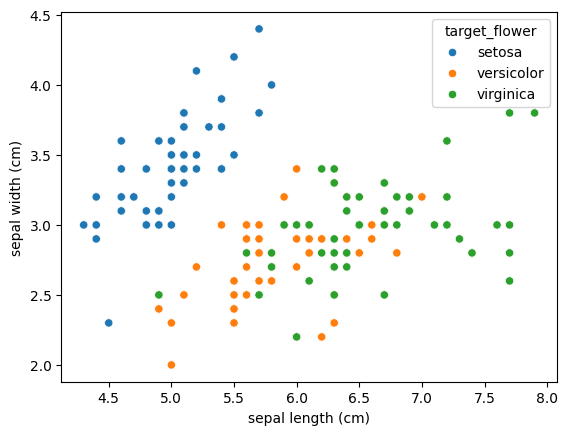

In [217]:
sns.scatterplot(df, x='sepal length (cm)', y = 'sepal width (cm)', hue='target_flower');

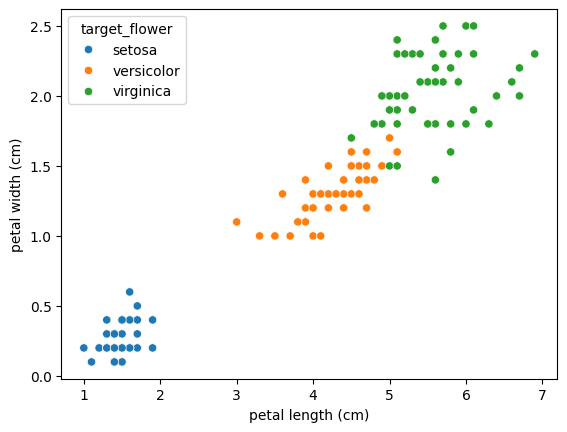

In [218]:
sns.scatterplot(df, x='petal length (cm)', y = 'petal width (cm)', hue='target_flower');

### Classifying the data

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

### Training the Model

In [243]:
model = LogisticRegression()

model.fit(X_train, y_train)

model_score = model.score(X_test, y_test)
print(f'model score: {model_score}')
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

model score: 0.9619047619047619


### Heat Map

Text(50.722222222222214, 0.5, 'True Values')

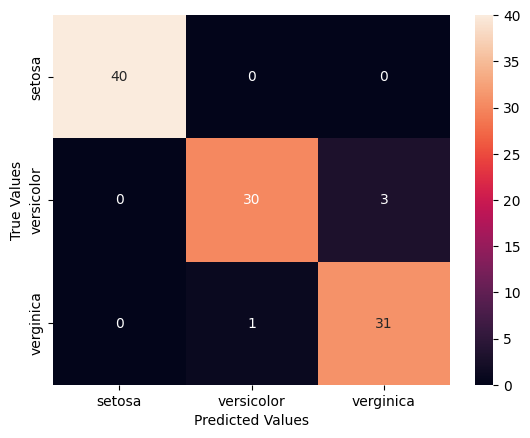

In [244]:
names = ['setosa', 'versicolor', 'verginica']
sns.heatmap(conf_mat, annot=True, xticklabels=names, yticklabels=names);
plt.xlabel('Predicted Values')
plt.ylabel('True Values')